## Lab 6.1

### Activity 1
Name: `rose-length`

A rose plot is given by 
$$
r(\theta) = \frac{1}{2} \sin (\theta^2 (2\pi - \theta)^2) + \frac{1}{2}
$$

1. Make a plot of the resulting rose curve for $\theta \in [0,2\pi]$. Add the corresponding unit circle that envelopes the rose curve.
2. Integrate the length of the rose curve to an accuracy of $0.16\%$ or better. Enter into quiz question  `rose-length`.

In [1]:
%pylab ipympl

Populating the interactive namespace from numpy and matplotlib


arclength is: 62.42100854964211
error: 0.10050875564079247


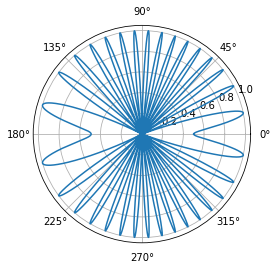

In [1]:
import numpy as np
import matplotlib.pyplot as plt
n = 100001
theta = linspace(0, 2*np.pi, n)
def func(theta):
    return (1/2)*sin((theta**2)*(2*np.pi-theta)**2)+1/2
r = func(theta)
#print(r)

#rad, angle = np.meshgrid(r, theta)
ax = plt.subplot(111, projection='polar')
ax.plot(theta, r)

x = r*cos(theta)
y = r*sin(theta)
#integrate the length
def integrateLen(x, y):
    length = 0
    for i in range(len(x)-1):
        dl = np.sqrt((x[i+1]-x[i])**2+(y[i+1]-y[i])**2)
        length += dl
    return length

integrateLen(x, y)
print("arclength is: {}".format(integrateLen(x, y)))
print("error: {}".format(0.0016*integrateLen(theta, r)))

### Activity 2
Name: `mp-2dint`

Integrate the function
$$ z(x,y) = x^4 \sin y
$$ 
for
$x \in [1.5,3.7]$ and 
$y \in [-3.2,4.8]$ using the Monte-Carlo mean-value method and multi-processing. Write a script for this activity and use the script written in class as a template. Specify in the script the parameters 
```Python 
nmc = 500000
nruns = 1000
nthreads = 4
```
which are the number of Monte Carlo points in each run, the number of runs, and the number of threads. Experiment using twice or half the number of threads. Without changing the amount of work to do how does the run time change?

Add the script to your Lab folder in your git repository.

Enter the value of the integral from this calculation into the quiz.


In [5]:
import numpy as np

nmc = 500000
nruns = 1000
nthreads = 4
x = linspace(1.5, 3.7, n)
y = linspace(-3.2, 4.8, n)

def z(x, y):
    return (x**4)*sin(y)

zVal = z(x, y)

def integral(zVal, x, y, nmc):
    xrand = np.zeros(nmc)
    yrand = np.zeros(nmc)
    tot = 0
    for i in range(nmc):
        xrand[i] =  random.uniform(1.5, 3.7)
        yrand[i] = random.uniform(-3.2, 4.8)
        
    for i in range(nmc):
        tot += z(xrand[i], yrand[i])
    
    return (2.2*8)*tot/float(nmc)

integral(zVal, x, y, nmc)

-148.33402585843763